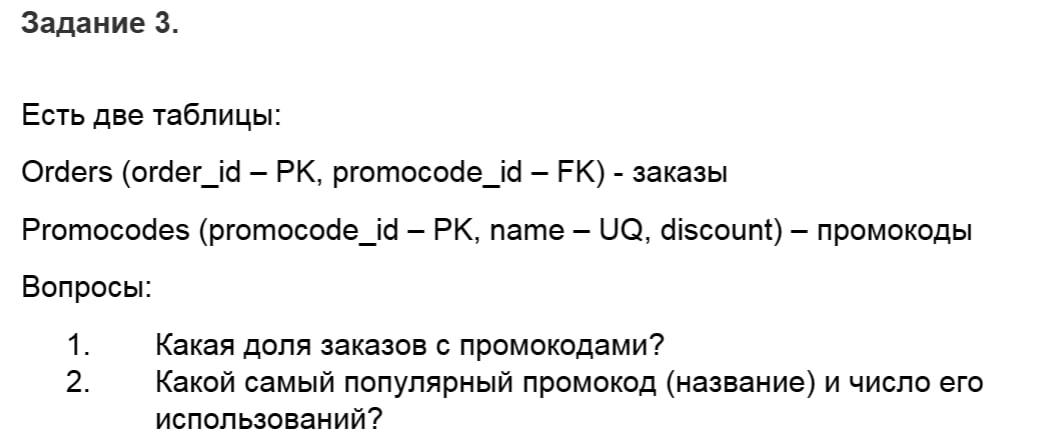

In [1]:
from IPython.display import Image
Image('3.jpg')

Cначала просто создадим и заполним таблицы примерами

In [ ]:
create table Orders (
    order_id integer primary key AUTOINCREMENT,
    promocode_id int,
    foreign key (promocode_id) references Promocodes(promocode_id)
);

create table Promocodes (
    promocode_id integer primary key AUTOINCREMENT,
    name varchar(50),
    discount int
);

INSERT INTO Promocodes (name, discount) VALUES
('WELCOME', 10),
('NEWYEAR', 20),
('BIRTHDAY', 15),
('BLACK', 30),
('SAINTPATRIC', 10);

INSERT INTO Orders (promocode_id) VALUES
(1),
(2),
(3),
(4),
(5),
(NULL),
(NULL),
(1),
(NULL),
(4),
(NULL),
(4),
(NULL),
(4),
(NULL);


Первое, что конечно пришло в голову, это использование COUNT(promocode_id)/COUNT(*), но с обработкой NULL в таком случае может возникнуть проблема. Поэтому:

In [ ]:
select count(case when promocode_id is not null then 1 end) * 100.0 / count(*) as promo_perc
from Orders;

-- или:

select count(promocode_id) * 100.0 /count(coalesce(promocode_id, 1)) as promo_perc
from Orders;

-- еще оказалось важным сначала умножать на 100, а потом уже делить :)

Изначально основной запрос был тот, в котором ищется самый популярный промокод. Дальше было много вариантов где и как использовать подзапрос, в итоге оставила так. Еще подумаю о том, как обработать ситуацию, если у нас есть несколько промокодов с одинаковой частотой использования. 

In [ ]:
select p.name
from Promocodes p
where p.promocode_id in (
    select promocode_id
    from Orders o
    where o.promocode_id is not null
    group by o.promocode_id
    order by count(*) desc
    limit 1
);

-- или так, но здесь не обойтись без вывода еще и кол-ва использований:

select p.name, count(*) as counter
from Orders o
join Promocodes p on o.promocode_id = p.promocode_id
where o.promocode_id is not null
group by p.name
order by counter desc
limit 1;